# Tandem Density vs GC-Threshold / Repeating Unit Length

In [4]:
from pathlib import Path
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from tqdm import tqdm
from collections import Counter
from collections import defaultdict
import numpy as np

load_dotenv('env.txt')
target = Path(os.getenv("tandem_path"))
target

PosixPath('/storage/group/izg5139/default/external/satellites/scripts/tandem_out')

In [5]:
domains = ["Archaea", "Eukaryota", "Bacteria", "Viruses"]
domain_colors = {'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

kingdom_color_palette = {
                          "Viruses": "#6bb5c7",
                         "Bacteria": "#0fbf2d",
                         "Archaea": "#b2b2ff",
                         "Fungi": "#4d325e",
                         "Plantae": "#b50996",
                        "Eubacteria": "#0fbf2d",
                        "Animalia": "#9bba2d",
                        "Protista": "#c78f5b",
                          "Archaeabacteria": "#7b7bed",
                } 


In [6]:
!ls

G4PaperSpeedOfLight.ipynb	 Venn_3.png
IRPRepeatDensity-Copy2.ipynb	 Venn_4.png
Intersections_3.txt		 anage_data.txt
Intersections_4.txt		 chordata_goldfish.png
TandemBiophysical.ipynb		 chordata_without_goldfish.png
TandemIdeas.ipynb		 domain_sru_counts.txt
TandemRepeatCompartments.ipynb	 env.txt
TandemRepeatDensity-Copy1.ipynb  human_t2t.merged.bed
TandemRepeatDensity.ipynb	 kingdom_sru_counts.txt
TandemRepeatsLoad.ipynb		 notebooks
TandemSimulation.ipynb		 sru_counts.txt
TandemTelomeres.ipynb		 tandemDensityDomainKingdom.ipynb
TelomeresAnalysis.ipynb		 tandemDensityVarying.ipynb
Untitled.ipynb			 viral_hosts.txt.gz
Untitled1.ipynb			 viruses.txt


In [7]:
assembly_df = pd.read_csv(target.joinpath("assembly_summary_newdb.txt.gz"), delimiter="\t")
assembly_df

,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
0,GCF_000762265.1,2449987,2445,2386,55,41.5,2162,Methanobacterium formicicum,Euryarchaeota,Archaeabacteria,Archaea
1,GCF_001458655.1,2494510,2462,2404,55,41.0,2162,Methanobacterium formicicum,Euryarchaeota,Archaeabacteria,Archaea
2,GCF_002813085.1,1805545,1782,1715,43,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea
3,GCF_022846155.1,1791153,1738,1680,44,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea
4,GCF_022846175.1,1791155,1739,1681,44,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea
...,...,...,...,...,...,...,...,...,...,...,...
118097,GCA_037114785.1,42928,na,na,na,35.0,3127874,Enterococcus phage vB_Efa_ZAT1,NaN,NaN,Viruses
118098,GCA_037114795.1,18740,na,na,na,37.5,3127946,Bacillus phage vB_Bsu_hmny1,NaN,NaN,Viruses
118099,GCA_037114805.1,18762,na,na,na,37.5,3127947,Bacillus phage vB_Bsu_hmny2,NaN,NaN,Viruses
118100,GCA_037114815.1,43533,na,na,na,43.5,3127948,Vibrio phage Va-ZX-1,NaN,NaN,Viruses


In [18]:
df_tandem = pd.read_parquet(target.joinpath("tandem_repeats_database.parquet.snappy"), engine="fastparquet")
df_tandem

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom
index,,,,,,,,,,,,,,,
0,GCA_000007325.1,AE009951.2,16462,16473,12,3,4,gat,gatgatgatgat,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
1,GCA_000007325.1,AE009951.2,43331,43342,12,3,4,ctt,cttcttcttctt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
2,GCA_000007325.1,AE009951.2,73427,73438,12,3,4,tta,ttattattatta,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
3,GCA_000007325.1,AE009951.2,79616,79627,12,3,4,tgt,tgttgttgttgt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
4,GCA_000007325.1,AE009951.2,87815,87826,12,3,4,ttc,ttcttcttcttc,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81864632,GCF_963920505.1,NZ_OY986433.1,3066044,3066055,12,3,4,gct,gctgctgctgct,3085273,66.0,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
81864633,GCF_963920505.1,NZ_OY986433.1,3069465,3069474,10,2,5,ct,ctctctctct,3085273,66.0,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria
81864634,GCF_963920505.1,NZ_OY986433.1,3079507,3079518,12,3,4,gcc,gccgccgccgcc,3085273,66.0,Synechococcus sp. CBW1107,Cyanobacteriota,Eubacteria,Bacteria


In [19]:
# df_tandem = df_tandem.merge(assembly_df, 
#                                how="left", 
#                                left_on="#assembly_accession",
#                                 # left_index=True, 
#                                right_on="#assembly_accession"
#                               )
# df_tandem

In [20]:
empty_accessions = pd.read_csv(target.joinpath("empty_tandem_accessions.txt"))
empty_accessions

,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom
0,GCA_031767755.1,2752,6,6,0,41.5,96054,Tomato leaf curl Philippines virus - [San Leon...,Cressdnaviricota,Shotokuvirae,Viruses
1,GCA_031239075.1,9245,na,na,na,39.0,2789945,Iflavirus IricIV-2,Pisuviricota,Orthornavirae,Viruses
2,GCF_000851025.1,10056,4,4,0,42.5,3052303,Mammarenavirus choriomeningitidis,Negarnaviricota,Orthornavirae,Viruses
3,GCA_003106905.1,9273,na,na,na,57.5,3052230,Hepatitis C virus subtype 4d,Kitrinoviricota,Orthornavirae,Viruses
4,GCA_004097295.1,1767,2,2,0,48.5,3048279,Porcine circovirus 2,Cressdnaviricota,Shotokuvirae,Viruses
...,...,...,...,...,...,...,...,...,...,...,...
17342,GCA_031163125.1,12269,na,na,na,46.0,3052619,Bovine viral diarrhea virus 1m,Kitrinoviricota,Orthornavirae,Viruses
17343,GCA_030513315.1,2196,na,na,na,49.5,2202565,Genomoviridae sp.,Cressdnaviricota,Shotokuvirae,Viruses
17344,GCA_031259915.1,7333,7,7,0,43.0,2866013,Bos taurus papillomavirus 39,Cossaviricota,Shotokuvirae,Viruses
17345,GCA_031123555.1,9784,na,na,na,44.0,12211,Plum pox virus strain Marcus,Pisuviricota,Orthornavirae,Viruses


# STR Density Drop in relation to GC Content

In [21]:
df_tandem.loc[:, "gc_content"] = df_tandem["consensus"].str.count("g|c").div(df_tandem["consensus"].str.len())
df_tandem.head()

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,gc_content
index,,,,,,,,,,,,,,,,
0,GCA_000007325.1,AE009951.2,16462,16473,12,3,4,gat,gatgatgatgat,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.333333
1,GCA_000007325.1,AE009951.2,43331,43342,12,3,4,ctt,cttcttcttctt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.333333
2,GCA_000007325.1,AE009951.2,73427,73438,12,3,4,tta,ttattattatta,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.000000
3,GCA_000007325.1,AE009951.2,79616,79627,12,3,4,tgt,tgttgttgttgt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.333333
4,GCA_000007325.1,AE009951.2,87815,87826,12,3,4,ttc,ttcttcttcttc,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.333333


In [22]:
unique_assemblies = set(df_tandem['#assembly_accession']) | set(empty_accessions['#assembly_accession'])
len(unique_assemblies)

114883

In [23]:
list(unique_assemblies)[:5]

['GCA_012940615.1',
 'GCA_025084135.1',
 'GCF_009388065.1',
 'GCF_015689395.1',
 'GCF_001921965.1']

In [24]:
map_to_domain = assembly_df[["#assembly_accession", "superkingdom"]].set_index("#assembly_accession")["superkingdom"].to_dict()
map_to_kingdom = assembly_df[["#assembly_accession", "kingdom"]].set_index("#assembly_accession")["kingdom"].to_dict()

### GC Threshold >0.5 relative to kingdom

In [16]:
assembly_df = assembly_df[assembly_df["superkingdom"].isin({"Archaea", "Viruses", "Bacteria", "Eukaryota"})]
assembly_df.loc[:, "kingdomRe"] = assembly_df['kingdom'].apply(lambda x: x if x in {"Fungi", "Plantae", "Animalia", "Protista", "Archaeabacteria", "Eubacteria"} else "Viruses")
assembly_df.head()

,#assembly_accession,genome_size,total_gene_count,protein_coding_gene_count,non_coding_gene_count,gc_percent,species_taxid,organism_name,phylum,kingdom,superkingdom,kingdomRe
0,GCF_000762265.1,2449987,2445,2386,55,41.5,2162,Methanobacterium formicicum,Euryarchaeota,Archaeabacteria,Archaea,Archaeabacteria
1,GCF_001458655.1,2494510,2462,2404,55,41.0,2162,Methanobacterium formicicum,Euryarchaeota,Archaeabacteria,Archaea,Archaeabacteria
2,GCF_002813085.1,1805545,1782,1715,43,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea,Archaeabacteria
3,GCF_022846155.1,1791153,1738,1680,44,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea,Archaeabacteria
4,GCF_022846175.1,1791155,1739,1681,44,31.0,2173,Methanobrevibacter smithii,Euryarchaeota,Archaeabacteria,Archaea,Archaeabacteria


In [25]:
df_tandem.loc[:, "kingdomRe"] = df_tandem['kingdom'].apply(lambda x: x if x in {"Fungi", "Plantae", "Animalia", "Protista", "Archaeabacteria", "Eubacteria"} else "Viruses")

In [26]:
df_threshold = df_tandem.query("gc_content > 0.5")
df_threshold.head()

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,gc_content,kingdomRe
index,,,,,,,,,,,,,,,,,
7,GCA_000007325.1,AE009951.2,137242,137253,12,3,4,gct,gctgctgctgct,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.666667,Eubacteria
18,GCA_000007325.1,AE009951.2,201647,201658,12,3,4,tgg,tggtggtggtgg,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.666667,Eubacteria
44,GCA_000007325.1,AE009951.2,572153,572164,12,3,4,ggt,ggtggtggtggt,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.666667,Eubacteria
45,GCA_000007325.1,AE009951.2,579588,579599,12,3,4,ctg,ctgctgctgctg,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.666667,Eubacteria
79,GCA_000007325.1,AE009951.2,974309,974323,15,3,5,gca,gcagcagcagcagca,2174500,27.0,Fusobacterium nucleatum subsp. nucleatum ATCC ...,Fusobacteriota,Eubacteria,Bacteria,0.666667,Eubacteria


In [27]:
df_tandem[~df_tandem['superkingdom'].isin({"Archaea", "Bacteria", "Eukaryota", "Viruses"})]

,#assembly_accession,chromosome,start,end,length,sru,consensus_repeats,consensus,sequence,genome_size,gc_percent,organism_name,phylum,kingdom,superkingdom,gc_content,kingdomRe
index,,,,,,,,,,,,,,,,,


In [28]:
empty_accessions_gc = unique_assemblies - set(df_threshold.index)
len(empty_accessions_gc)

114883

In [29]:
list(empty_accessions_gc)[:5]

['GCA_012940615.1',
 'GCA_025084135.1',
 'GCF_009388065.1',
 'GCF_015689395.1',
 'GCF_001921965.1']

In [30]:
grouped_accessions = df_threshold.reset_index().groupby("#assembly_accession", as_index=False)\
                                .agg(tandemCounts=("consensus", "count"),
                                     genome_size=("genome_size", "first"),
                                     kingdom=("kingdomRe", "first"),
                                     superkingdom=("superkingdom", "first"),
                                    )\
                                .assign(tandemDensity=lambda ds: 1e6 * ds['tandemCounts'].div(ds['genome_size']) )\
                                .drop(columns=["genome_size", "tandemCounts"])

empty_accessions_gc = pd.DataFrame(empty_accessions_gc, columns=["#assembly_accession"])\
                                                                            .merge(assembly_df[["#assembly_accession", "kingdomRe", "superkingdom"]], how="left")\
                                                                            .rename(columns={"kingdomRe": "kingdom"})
empty_accessions_gc.loc[:, "tandemDensity"] = 0.0
grouped_accessions = pd.concat([grouped_accessions, empty_accessions_gc[["#assembly_accession", "kingdom", "tandemDensity", "superkingdom"]] ], axis=0)
grouped_accessions

,#assembly_accession,kingdom,superkingdom,tandemDensity
0,GCA_000007325.1,Eubacteria,Bacteria,5.058634
1,GCA_000007385.1,Eubacteria,Bacteria,129.314558
2,GCA_000008005.1,Eubacteria,Bacteria,2.577010
3,GCA_000008885.1,Eubacteria,Bacteria,4.267401
4,GCA_000009845.1,Eubacteria,Bacteria,8.205446
...,...,...,...,...
114878,GCA_003308175.1,Viruses,Viruses,0.000000
114879,GCA_020483765.1,Viruses,Viruses,0.000000
114880,GCA_003828895.1,Viruses,Viruses,0.000000
114881,GCF_002037795.1,Viruses,Viruses,0.000000


In [31]:
empty_accessions_gc.superkingdom.value_counts()

superkingdom
Viruses      65130
Bacteria     48589
Archaea        682
Eukaryota      482
Name: count, dtype: int64

In [33]:
target

PosixPath('/storage/group/izg5139/default/external/satellites/scripts/tandem_out')

/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/group/izg5139/default/nicole/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


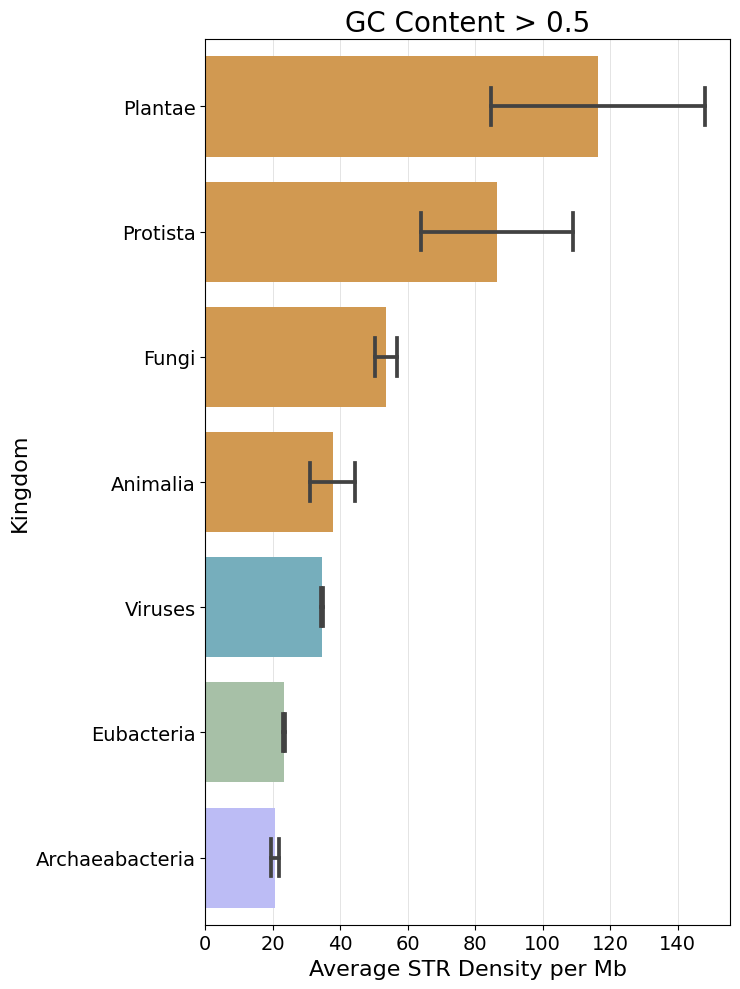

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 10))

sns.barplot(x='tandemDensity', 
            y='kingdom', 
            orient="h", 
            # width=0.5,
            dodge=False,
            errorbar=('se', .99), 
            capsize=.3,
            data=grouped_accessions.sort_values(by=['tandemDensity'], ascending=False), 
            hue="superkingdom", 
            palette=domain_colors,
            order=["Plantae", "Protista", "Fungi", "Animalia", "Viruses", "Eubacteria", "Archaeabacteria"],
            ax=ax,
            alpha=1.0
           )

ax.xaxis.grid(True, linewidth=0.4, alpha=0.6, zorder=0)
ax.set_ylabel("Kingdom")
ax.yaxis.label.set_size(16)
ax.legend(title="", frameon=False, handles=[], bbox_to_anchor=(.35, 0.2), shadow=False, prop={"size": 18})
# ax.set_xlim(0, 15.0)
ax.set_xlabel(r"Average STR Density per Mb")
ax.xaxis.label.set_size(16)
ax.tick_params(axis="both",  which="major", labelsize=14)
ax.set_axisbelow(True)
ax.margins(y=0.02)
ax.set_title("GC Content > 0.5")
ax.title.set_size(20)

plt.tight_layout()
fig.savefig(f"{target}/microsatellite_gc_threshold_coverage_over_kingdoms_0.5.png", bbox_inches='tight')
plt.show();

In [78]:
len(unique_assemblies)

114883

In [79]:
step_size = 0.1
thresholds = np.arange(0.0, 1.1, step_size)
thresholded_marks = {}

for domain in domains:
    thresholded_marks[domain] = defaultdict(list)

total_assemblies = len(unique_assemblies)
for threshold in tqdm(thresholds, leave=True, position=0, total=len(thresholds)):
    thresholded = df_tandem.query(f"gc_content >= {threshold}")
    grouped_genome_size = thresholded.groupby("#assembly_accession")\
                                        .agg({
                                          "consensus": "count",
                                          "genome_size": "first",
                                          "superkingdom": "first",
                                        })\
                                        .rename(columns={"consensus": "tandemCounts"})\
                                        .assign(coverage=lambda df: 1e6 * (df['tandemCounts']).div(df['genome_size']))\
                                        .drop(columns=['genome_size'])
    
    seen_assemblies = set(grouped_genome_size.index)
    unseen_assemblies =  unique_assemblies - seen_assemblies
    empty_counts = {"Eukaryota": 0, "Viruses": 0, "Archaea": 0, "Bacteria": 0}
    
    for assembly in unseen_assemblies:
        empty_counts[map_to_domain[assembly]] += 1
    
    for domain in domains:
        temp = grouped_genome_size.query(f"superkingdom == '{domain}'").drop(columns=['superkingdom'])
        _mean_coverage = temp['coverage'].sum() / (temp.shape[0] + empty_counts[domain])

        temp = pd.concat([temp, pd.DataFrame([{'coverage': 0}] * empty_counts[domain])], axis=0)
        mean_coverage = temp['coverage'].mean()
        assert abs(mean_coverage - _mean_coverage) < 0.001, f"{mean_coverage} != {_mean_coverage}"
        
        std_coverage = temp['coverage'].std() / temp.shape[0] ** 0.5

        domain_mini = mean_coverage
        domain_std = std_coverage
        thresholded_marks[domain]["threshold"].append(threshold)
        thresholded_marks[domain]["coverage"].append(domain_mini)
        thresholded_marks[domain]["std_err_coverage"].append(domain_std)

100%|██████████| 11/11 [04:48<00:00, 26.25s/it]


In [81]:
import math

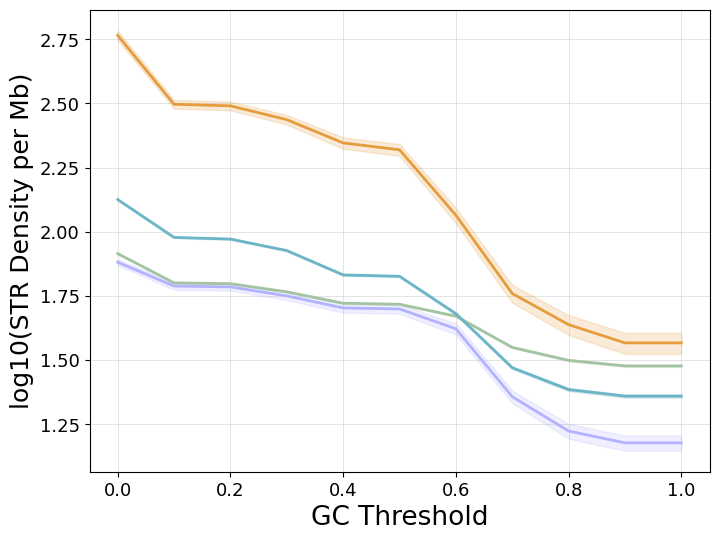

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
deviations = 1.0
flog = lambda y: list(map(lambda x: math.log(x+1, 10), y))

for domain in domains:
    ax.plot(thresholded_marks[domain]["threshold"], 
            flog(thresholded_marks[domain]["coverage"]), 
            color=domain_colors[domain], 
            zorder=3,
           lw=2.0,
           )
    ax.fill_between(thresholded_marks[domain]["threshold"], 
                    flog(np.array(thresholded_marks[domain]["coverage"]) - deviations * np.array(thresholded_marks[domain]["std_err_coverage"])),
                    flog(np.array(thresholded_marks[domain]["coverage"]) + deviations * np.array(thresholded_marks[domain]["std_err_coverage"])),
                    alpha=0.2, 
                    color=domain_colors[domain]
                          )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_xlabel("GC Threshold")
    ax.xaxis.label.set_size(19)
    ax.yaxis.label.set_size(18)
    ax.set_ylabel("log10(STR Density per Mb)")
    ax.tick_params(axis="both", which="major", labelsize=13)

dest = target.joinpath("figures", "varying_density")
dest.mkdir(exist_ok=True)
fig.savefig(f"{dest}/STR_coverage_vs_GC_threshold_domains.png", bbox_inches='tight')

## Kingdom Level

In [83]:
df_tandem.loc[:, "kingdomRe"] = df_tandem["kingdom"].apply(lambda x: x if x in {"Fungi", "Archaeabacteria", "Eubacteria", "Animalia", "Protista", "Plantae"} else "Viruses")
map_to_kingdom = assembly_df[["#assembly_accession", "kingdom"]].assign(kingdomRe=lambda ds: ds["kingdom"].apply(lambda x: x if x in {"Fungi", "Archaeabacteria", "Eubacteria", "Animalia", "Protista", "Plantae"} else "Viruses"))\
                                                        .set_index("#assembly_accession")["kingdomRe"].to_dict()
len(map_to_kingdom)

118102

In [84]:
kingdoms = ["Fungi", "Protista", "Animalia", "Plantae", "Archaeabacteria", "Eubacteria", "Viruses"]

In [85]:
kingdom_color_palette

{'Viruses': '#6bb5c7',
 'Bacteria': '#0fbf2d',
 'Archaea': '#b2b2ff',
 'Fungi': '#4d325e',
 'Plantae': '#b50996',
 'Eubacteria': '#0fbf2d',
 'Animalia': '#9bba2d',
 'Protista': '#c78f5b',
 'Archaeabacteria': '#7b7bed'}

In [86]:
thresholded['kingdomRe'].unique()

array(['Eubacteria', 'Archaeabacteria', 'Fungi', 'Viruses', 'Plantae',
       'Protista', 'Animalia'], dtype=object)

In [87]:
set(map_to_kingdom.values())

{'Animalia',
 'Archaeabacteria',
 'Eubacteria',
 'Fungi',
 'Plantae',
 'Protista',
 'Viruses'}

In [120]:
step_size = 0.1
thresholds = np.arange(0.0, 1.1, step_size)
thresholded_kingdom_marks = {}

kingdoms = ["Fungi", "Protista", "Animalia", "Plantae", "Archaeabacteria", "Eubacteria", "Viruses"]
for kingdom in kingdoms:
    thresholded_kingdom_marks[kingdom] = defaultdict(list)

total_assemblies = len(unique_assemblies)
for threshold in tqdm(thresholds, leave=True, position=0, total=len(thresholds)):
    thresholded = df_tandem.query(f"gc_content >= {threshold}")
    grouped_genome_size = thresholded.groupby("#assembly_accession")\
                                        .agg({
                                          "consensus": "count",
                                          "genome_size": "first",
                                          "superkingdom": "first",
                                          "kingdomRe": "first",
                                        })\
                                        .rename(columns={"consensus": "tandemCounts", 
                                                         "kingdomRe": "kingdom"
                                                        })\
                                        .assign(coverage=lambda df: 1e6 * (df['tandemCounts']).div(df['genome_size']))\
                                        .drop(columns=['genome_size'])
    
    seen_assemblies = set(grouped_genome_size.index)
    unseen_assemblies =  unique_assemblies - seen_assemblies
    empty_counts = {"Fungi": 0, "Protista": 0, "Plantae": 0, "Animalia": 0, "Viruses": 0, "Archaeabacteria": 0, "Eubacteria": 0}
    for assembly in unseen_assemblies:
        empty_counts[map_to_kingdom[assembly]] += 1
    
    for kingdom in kingdoms:
        temp = grouped_genome_size.query(f"kingdom == '{kingdom}'").drop(columns=['superkingdom', 'kingdom'])
        _mean_coverage = temp['coverage'].sum() / (temp.shape[0] + empty_counts[kingdom])

        temp = pd.concat([temp, pd.DataFrame([{'coverage': 0}] * empty_counts[kingdom])], axis=0)
        mean_coverage = temp['coverage'].mean()
        assert abs(mean_coverage - _mean_coverage) < 0.001, f"{mean_coverage} != {_mean_coverage}"
        
        std_coverage = temp['coverage'].std() / temp.shape[0] ** 0.5

        domain_mini = mean_coverage
        domain_std = std_coverage
        thresholded_kingdom_marks[kingdom]["threshold"].append(threshold)
        thresholded_kingdom_marks[kingdom]["str_coverage"].append(domain_mini)
        thresholded_kingdom_marks[kingdom]["std_err_coverage"].append(domain_std)

100%|██████████| 11/11 [03:44<00:00, 20.40s/it]


In [121]:
kingdoms = {'Fungi', 'Viruses', 'Archaeabacteria', 'Eubacteria', 'Plantae', 'Protista', 'Animalia'}
kingdoms

{'Animalia',
 'Archaeabacteria',
 'Eubacteria',
 'Fungi',
 'Plantae',
 'Protista',
 'Viruses'}

In [176]:
pd.DataFrame(thresholded_kingdom_marks)

,Fungi,Protista,Animalia,Plantae,Archaeabacteria,Eubacteria,Viruses
threshold,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
str_coverage,"[443.28790322426204, 260.7511424125138, 257.00...","[1425.1285288011848, 492.27710814406737, 483.4...","[964.0403468208472, 535.7302918498235, 529.992...","[886.1448576305187, 477.48034305754163, 471.60...","[75.07641659782904, 60.46521044337339, 59.9699...","[81.21319181449383, 62.22116877528018, 61.7473...","[132.4998439521913, 94.04563831035328, 92.6422..."
std_err_coverage,"[14.797638656336852, 9.16416483692624, 9.01625...","[250.8221668543331, 81.85456939539071, 82.3465...","[66.88835946339509, 46.56370721446506, 46.3952...","[57.35923332728143, 63.88284951142634, 64.1109...","[2.0136847490289402, 1.9705519146760557, 1.974...","[0.6268822034457373, 0.2971131197467547, 0.296...","[0.7846479998718712, 0.6184211523845607, 0.615..."


In [180]:
thresholded_df = pd.DataFrame(thresholded_kingdom_marks).explode(['Fungi', 'Eubacteria', 'Archaeabacteria', 'Protista', 'Plantae', 'Animalia', 'Viruses']).reset_index().query("index == 'str_coverage'")
thresholded_df

,index,Fungi,Protista,Animalia,Plantae,Archaeabacteria,Eubacteria,Viruses
11,str_coverage,443.287903,1425.128529,964.040347,886.144858,75.076417,81.213192,132.499844
12,str_coverage,260.751142,492.277108,535.730292,477.480343,60.46521,62.221169,94.045638
13,str_coverage,257.004591,483.464816,529.992817,471.605826,59.96994,61.747372,92.642259
14,str_coverage,227.412701,442.482265,419.823662,427.537598,55.236068,57.331229,83.474836
15,str_coverage,177.794579,375.230966,369.228653,371.284339,49.481102,51.678344,66.885705
16,str_coverage,168.922117,370.728311,273.595716,360.535607,49.031667,51.181377,66.068351
17,str_coverage,99.395695,166.453366,63.760227,224.548008,40.858781,45.912686,46.941075
18,str_coverage,48.239123,92.628914,37.7916,104.377995,21.764807,34.435185,28.533232
19,str_coverage,36.082084,64.329313,23.82769,85.582897,15.728793,30.541096,23.276482
20,str_coverage,30.02706,56.99676,20.684389,74.084178,14.046972,29.008353,21.88912


In [193]:
100 * (443.287 - 260.75)/443.287

41.1780629704909

In [179]:
thresholded_df = pd.DataFrame(thresholded_kingdom_marks).explode(['Fungi', 'Eubacteria', 'Archaeabacteria', 'Protista', 'Plantae', 'Animalia', 'Viruses']).reset_index().query("index == 'str_coverage'").drop(columns=['index'])\
                    .pct_change()
thresholded_df

,Fungi,Protista,Animalia,Plantae,Archaeabacteria,Eubacteria,Viruses
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,-0.411779,-0.654574,-0.444286,-0.461171,-0.194618,-0.233854,-0.290221
13,-0.014368,-0.017901,-0.010710,-0.012303,-0.008191,-0.007615,-0.014922
14,-0.115141,-0.084768,-0.207869,-0.093443,-0.078937,-0.071520,-0.098955
15,-0.218185,-0.151986,-0.120515,-0.131575,-0.104189,-0.098600,-0.198732
16,-0.049903,-0.012000,-0.259007,-0.028950,-0.009083,-0.009617,-0.012220
17,-0.411589,-0.551010,-0.766955,-0.377182,-0.166686,-0.102942,-0.289507
18,-0.514676,-0.443514,-0.407286,-0.535164,-0.467316,-0.249985,-0.392148
19,-0.252016,-0.305516,-0.369498,-0.180068,-0.277329,-0.113085,-0.184233
20,-0.167812,-0.113985,-0.131918,-0.134358,-0.106926,-0.050186,-0.059604


Protista
Fungi
Plantae
Eubacteria
Animalia
Archaeabacteria
Viruses


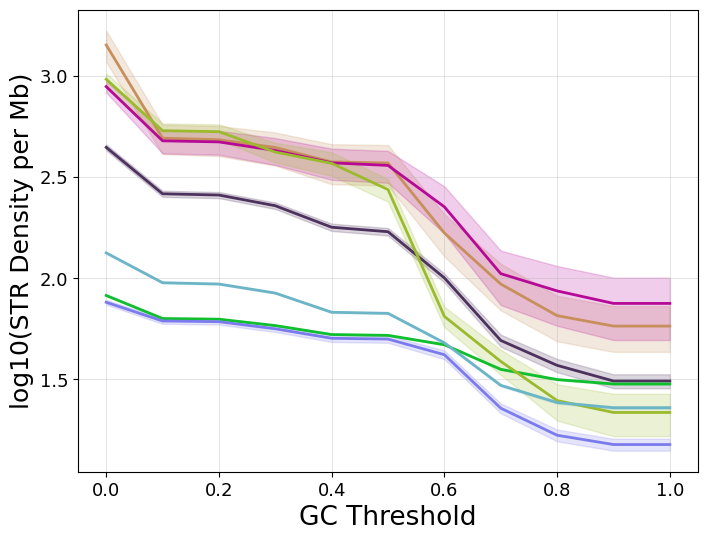

In [181]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
deviations = 1.0
flog = lambda y: list(map(lambda x: math.log(x+1, 10), y))
    
for kingdom in {'Fungi', 'Viruses', 'Archaeabacteria', 'Eubacteria', 'Plantae', 'Protista', 'Animalia'}:
    print(kingdom)
    ax.plot(thresholded_kingdom_marks[kingdom]["threshold"], 
            flog(thresholded_kingdom_marks[kingdom]["str_coverage"]), 
            color=kingdom_color_palette[kingdom], 
            zorder=3,
           lw=2.0,
           )
    ax.fill_between(thresholded_kingdom_marks[kingdom]["threshold"], 
                    flog(np.array(thresholded_kingdom_marks[kingdom]["str_coverage"]) - deviations * np.array(thresholded_kingdom_marks[kingdom]["std_err_coverage"])),
                    flog(np.array(thresholded_kingdom_marks[kingdom]["str_coverage"]) + deviations * np.array(thresholded_kingdom_marks[kingdom]["std_err_coverage"])),
                    alpha=0.2, 
                    color=kingdom_color_palette[kingdom]
                          )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_xlabel("GC Threshold")
    ax.xaxis.label.set_size(19)
    ax.yaxis.label.set_size(18)
    ax.set_ylabel("log10(STR Density per Mb)")
    ax.tick_params(axis="both", which="major", labelsize=13)

dest = target.joinpath("figures", "varying_density")
dest.mkdir(exist_ok=True)
fig.savefig(f"{dest}/STR_coverage_vs_GC_threshold_kingdoms.png", bbox_inches='tight')

# Varying STR Density vs Repeating Unit Threshold

In [88]:
step_size = 0.1
thresholded_sru = {}

for domain in domains:
    thresholded_sru[domain] = defaultdict(list)

total_assemblies = len(unique_assemblies)

for threshold in tqdm(range(9, 0, -1), leave=True, position=0, total=9):
    thresholded = df_tandem.query(f"sru <= {threshold}")
    grouped_genome_size = thresholded.groupby("#assembly_accession")\
                                        .agg({
                                                          "consensus": "count", 
                                                          "genome_size": "first",
                                                          "superkingdom": "first",
                                    })\
                            .rename(columns={"consensus": "tandemCounts"})\
                            .assign(coverage=lambda df: 1e6 * (df['tandemCounts']).div(df['genome_size']))
    
    seen_assemblies = set(grouped_genome_size.index)
    unseen_assemblies =  unique_assemblies - seen_assemblies
    empty_counts = {"Eukaryota": 0, "Viruses": 0, "Archaea": 0, "Bacteria": 0}
    for assembly in unseen_assemblies:
        empty_counts[map_to_domain[assembly]] += 1
    
    for domain in domains:
        temp = grouped_genome_size.query(f"superkingdom == '{domain}'").drop(columns=['superkingdom', 'genome_size'])
        _mean_coverage = temp['coverage'].sum() / (temp.shape[0] + empty_counts[domain])

        temp = pd.concat([temp, pd.DataFrame([{'coverage': 0}] * empty_counts[domain])], axis=0)
        mean_coverage = temp['coverage'].mean()
        assert abs(mean_coverage - _mean_coverage) < 0.001, f"{mean_coverage} != {_mean_coverage}"
        
        std_coverage = temp['coverage'].std() / temp.shape[0] ** 0.5

        domain_mini = mean_coverage
        domain_std = std_coverage
        thresholded_sru[domain]["threshold"].append(threshold)
        thresholded_sru[domain]["coverage"].append(domain_mini)
        thresholded_sru[domain]["std_err_coverage"].append(domain_std)

100%|██████████| 9/9 [05:13<00:00, 34.82s/it]


In [153]:
thresholded_sru_df = pd.DataFrame(thresholded_sru)
thresholded_sru_df

,Eukaryota,Bacteria,Archaea,Viruses
threshold,"[9, 8, 7, 6, 5, 4, 3, 2, 1]","[9, 8, 7, 6, 5, 4, 3, 2, 1]","[9, 8, 7, 6, 5, 4, 3, 2, 1]","[9, 8, 7, 6, 5, 4, 3, 2, 1]"
coverage,"[581.4218427028698, 576.6741414521108, 573.365...","[81.21319181449383, 80.33279728091387, 79.8003...","[75.07641659782904, 74.33108500897617, 74.1077...","[132.4998439521913, 130.80471789209741, 130.43..."
std_err_coverage,"[24.757270434105617, 24.65586891215661, 24.561...","[0.6268822034457373, 0.6230065709789758, 0.620...","[2.0136847490289402, 1.9883693514621672, 1.983...","[0.7846479998718712, 0.7821865211960228, 0.780..."


In [154]:
thresholded_sru_df = thresholded_sru_df.iloc[1:, :].explode(['Eukaryota', 'Bacteria', 'Archaea', 'Viruses']).reset_index().query("index == 'coverage'").drop(columns=['index'])
thresholded_sru_df

,Eukaryota,Bacteria,Archaea,Viruses
0,581.421843,81.213192,75.076417,132.499844
1,576.674141,80.332797,74.331085,130.804718
2,573.365526,79.800397,74.107728,130.435656
3,567.033229,78.523485,73.75165,128.932421
4,538.137521,75.157517,69.618638,122.089192
5,505.308717,72.785371,67.032952,118.298402
6,425.325067,56.028915,46.983104,91.384419
7,296.172516,27.119991,13.751918,47.953965
8,178.056877,9.019039,3.399998,24.313631


<Axes: >

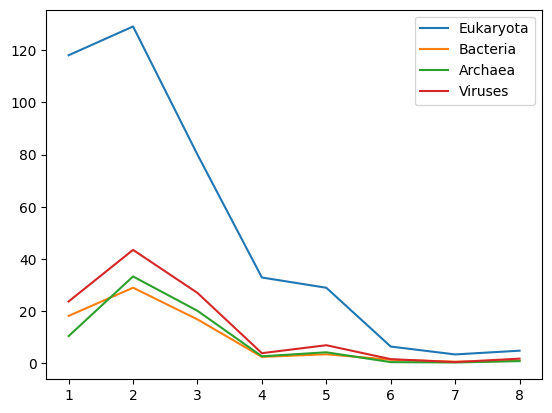

In [158]:
thresholded_sru_df.iloc[list(range(8, -1, -1)), :].reset_index(drop=True).diff().plot()

In [198]:
domain_colors = {'Viruses': '#6bb5c7',
 'Eukaryota': '#e69c3c',
 'Archaea': '#b2b2ff',
 'Bacteria': '#a3c4a3'}

In [205]:
pd.DataFrame(thresholded_sru).iloc[1:, :].explode(column=['Eukaryota', 'Bacteria', 'Archaea', 'Viruses']).reset_index().query("index == 'coverage'")

,index,Eukaryota,Bacteria,Archaea,Viruses
0,coverage,581.421843,81.213192,75.076417,132.499844
1,coverage,576.674141,80.332797,74.331085,130.804718
2,coverage,573.365526,79.800397,74.107728,130.435656
3,coverage,567.033229,78.523485,73.75165,128.932421
4,coverage,538.137521,75.157517,69.618638,122.089192
5,coverage,505.308717,72.785371,67.032952,118.298402
6,coverage,425.325067,56.028915,46.983104,91.384419
7,coverage,296.172516,27.119991,13.751918,47.953965
8,coverage,178.056877,9.019039,3.399998,24.313631


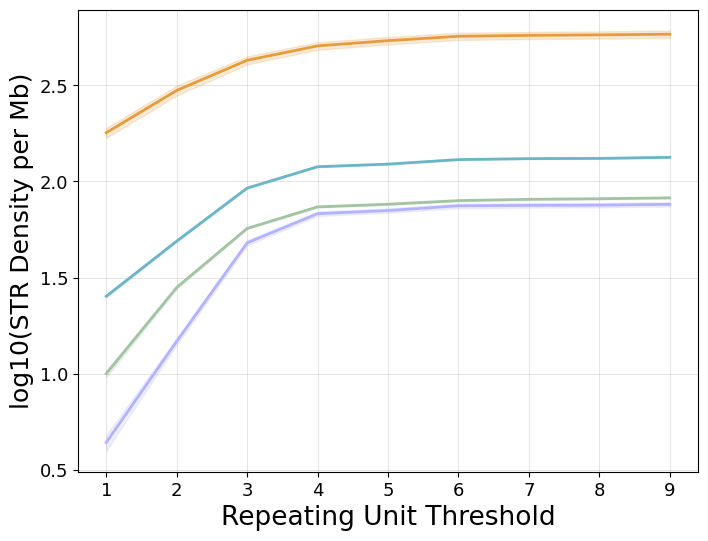

In [199]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
deviations = 1.0
flog = lambda y: list(map(lambda x: math.log(x+1, 10), y))

for domain in domains:
    ax.plot(thresholded_sru[domain]["threshold"], 
            flog(thresholded_sru[domain]["coverage"]), 
            color=domain_colors[domain], 
            zorder=3,
           lw=2.0,
           )
    ax.fill_between(thresholded_sru[domain]["threshold"], 
                    flog(np.array(thresholded_sru[domain]["coverage"]) - deviations * np.array(thresholded_sru[domain]["std_err_coverage"])),
                    flog(np.array(thresholded_sru[domain]["coverage"]) + deviations * np.array(thresholded_sru[domain]["std_err_coverage"])),
                    alpha=0.2, 
                    color=domain_colors[domain]
                          )
    ax.grid(lw=0.4, alpha=0.6, zorder=0)
    ax.set_xlabel("Repeating Unit Threshold")
    ax.xaxis.label.set_size(19)
    ax.yaxis.label.set_size(18)
    ax.set_ylabel("log10(STR Density per Mb)")
    ax.tick_params(axis="both", which="major", labelsize=13)

dest = target.joinpath("figures", "varying_density")
dest.mkdir(exist_ok=True)
fig.savefig(f"{target}/microsatellite_coverage_vs_sru_threshold_domains.png", bbox_inches='tight')
plt.show();